Library Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/DATASET/New Dataset 2 class.csv')
dataset.head(5)

,Max,Min,STD,Kurtosis,Skewness,Class
0,2.984815,1.168864,0.147750,15.835978,-1.991657,0
1,2.884451,1.185363,0.163563,9.794411,-1.406157,0
2,2.933216,1.137018,0.173689,23.445637,-3.060911,0
3,2.940840,2.119462,0.135659,3.656691,-0.836316,0
4,2.931511,1.161739,0.130314,26.033551,-2.721046,0


In [ ]:
print("Data shape:",dataset.shape)

Data shape: (537, 6)


In [ ]:
dataset.isnull().sum()
print(dataset.isnull().sum())

Max         0
Min         0
STD         0
Kurtosis    0
Skewness    0
Class       0
dtype: int64


In [ ]:
X = dataset.iloc[:, 0:5].values
x = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5].values
y_name = dataset.iloc[:, 5:6]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (537, 5)
y shape: (537, 1)


In [ ]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

Max
Min  
STD
Kurtosis
Skewness


Class:
Class


Co-relation Matrix (To know identify the relationship of target with attributes

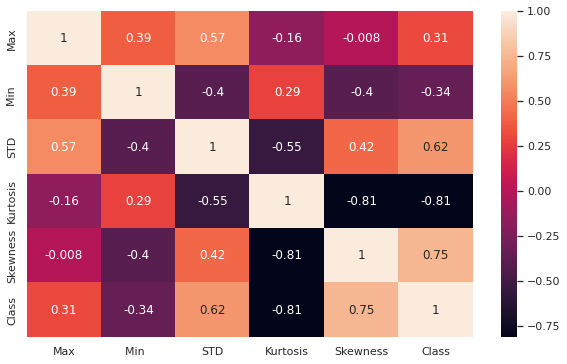

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

Splitting (Train/Test) (70% Train, 30% Test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20)
X, y = sm.fit_resample(X, y)

In [ ]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (840, 5)
y shape: (840,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature Scaling (Difference between Each Attributes)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [ ]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
print(y_pred_knn)


[1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[125   0]
 [  1 126]]


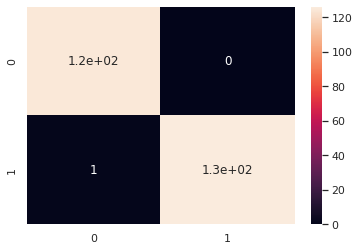

In [ ]:
sn.heatmap(cm_knn, annot= True)

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *Knn*')
print(classification_report(y_test, y_pred_knn))
print('\n')

Classification Report *Knn*
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       127

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252





SVM

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC( C=1.0,kernel = 'rbf',probability=True, random_state = 32)

In [ ]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(probability=True, random_state=32)

In [ ]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[125   0]
 [  1 126]]


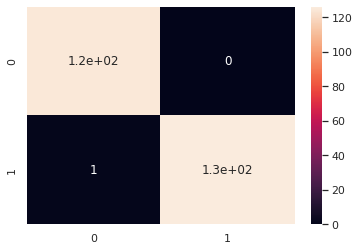

In [ ]:
sn.heatmap(cm_knn, annot= True)

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *svm*')
print(classification_report(y_test, y_pred_svm))
print('\n')

Classification Report *svm*
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       127

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252





Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 32)

In [ ]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[125   0]
 [  1 126]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *dt*')
print(classification_report(y_test, y_pred_dt))
print('\n')

Classification Report *dt*
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       127

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252





Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(dual=False,penalty="l2",random_state=32)

In [ ]:
#Training the decision tree
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=32)

In [ ]:
#Predicting the test set results
y_pred_lr=classifier_lr.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[125   0]
 [  1 126]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *lr*')
print(classification_report(y_test, y_pred_lr))
print('\n')

Classification Report *lr*
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       127

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252





Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(priors=None)

In [ ]:
#Training the decision tree
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting the test set results
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm_GaussianNB)

[[114  11]
 [  3 124]]


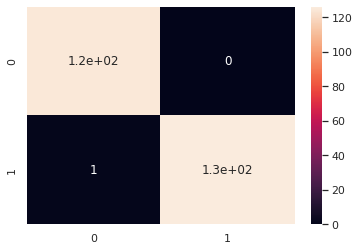

In [ ]:
sn.heatmap(cm_knn, annot= True)

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *GaussianNB*')
print(classification_report(y_test, y_pred_GaussianNB))
print('\n')

Classification Report *GaussianNB*
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       125
           1       0.92      0.98      0.95       127

    accuracy                           0.94       252
   macro avg       0.95      0.94      0.94       252
weighted avg       0.95      0.94      0.94       252





Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion="gini",min_samples_leaf=1,random_state=0, n_estimators=32)

In [ ]:
#Training the decision tree
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=32, random_state=0)

In [ ]:
#Predicting the test set results
y_pred_rf=classifier_rf.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[125   0]
 [  1 126]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report *rf*')
print(classification_report(y_test, y_pred_rf))
print('\n')

Classification Report *rf*
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       127

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



